Description of observable trends based on the data
1. The cities around the Equator(0 dregree Latitude) have the highest temperatures as compared to the rest of the earth.
2. The teperatures and other weather parameter values vary significatly based on the time of the day that we are pulling the values from the Openweather Api as it might lead to different values.
3. The temperatures are the lowest at the poles as you move away from the equator towards the north and south poles.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

# Set up the URL.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# setting up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_temp = []
Wind_Speed = []
counter = 0
Set = 1

# Looping through the list of cities and requesting for data on each
print("Beginning Data Retrieval ")
print("----------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    time.sleep(1)
    try:
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f"Processing Record {counter} of Set {Set} | {city}")
        if counter==49:
            counter=0
            Set+=1
        else:
            counter+=1
    except KeyError:
        print("City not found. Skipping...")
        pass


print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")




Beginning Data Retrieval 
----------------------------
Processing Record 0 of Set 1 | puerto ayora
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | ambanja
Processing Record 4 of Set 1 | tocopilla
Processing Record 5 of Set 1 | port macquarie
Processing Record 6 of Set 1 | lompoc
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | ardabil
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | cabra
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | kailua
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | caranavi
Processing Record 16 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 17 of Set 1 | eureka
Processing Record 18 of Set 1 | poum
Processing Record 19 of Set 1 | bahawalpur
City not found. Skipping...
Processing Record 20 of Set 1 | jamestown
Proces

Processing Record 37 of Set 4 | oistins
Processing Record 38 of Set 4 | lebu
Processing Record 39 of Set 4 | thompson
Processing Record 40 of Set 4 | glarus
Processing Record 41 of Set 4 | yar-sale
Processing Record 42 of Set 4 | husavik
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | khandyga
City not found. Skipping...
Processing Record 45 of Set 4 | bengkulu
Processing Record 46 of Set 4 | saskylakh
Processing Record 47 of Set 4 | manacapuru
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | takoradi
Processing Record 0 of Set 5 | tuatapere
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | helong
Processing Record 3 of Set 5 | canutama
Processing Record 4 of Set 5 | oksfjord
Processing Record 5 of Set 5 | deputatskiy
Processing Record 6 of Set 5 | marawi
Processing Record 7 of Set 5 | tautira
Processing Record 8 of Set 5 | sungaipenuh
Processing Record 9 of Set 5 | andros town
Processing Record 10 of Se

Processing Record 23 of Set 8 | champoton
Processing Record 24 of Set 8 | nhulunbuy
Processing Record 25 of Set 8 | wuhu
Processing Record 26 of Set 8 | broome
Processing Record 27 of Set 8 | coihaique
City not found. Skipping...
Processing Record 28 of Set 8 | vila franca do campo
Processing Record 29 of Set 8 | turukhansk
Processing Record 30 of Set 8 | villazon
Processing Record 31 of Set 8 | raton
Processing Record 32 of Set 8 | kudymkar
City not found. Skipping...
Processing Record 33 of Set 8 | svobodnyy
Processing Record 34 of Set 8 | pontianak
Processing Record 35 of Set 8 | tymovskoye
Processing Record 36 of Set 8 | chapais
Processing Record 37 of Set 8 | tomatlan
Processing Record 38 of Set 8 | dandong
Processing Record 39 of Set 8 | puro
Processing Record 40 of Set 8 | bauchi
Processing Record 41 of Set 8 | masuguru
Processing Record 42 of Set 8 | hermosillo
Processing Record 43 of Set 8 | penzance
City not found. Skipping...
Processing Record 44 of Set 8 | yarada
Processing

In [4]:
#Exporting the city data into a .csv and Displaying the DataFrame.


weather_data = pd.DataFrame({"City":City,"Cloudiness":Cloudiness,"Country":Country,"Date":Date,
                             "Humidity":Humidity,"Latitude":Lat,"Longitude":Lng,"Max Temperature":Max_temp,"Wind Speed":Wind_Speed})

weather_data.to_csv("output_data_file", index=False, header=True)

weather_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Puerto Ayora,20,EC,1583959155,70,-0.74,-90.35,86.00,9.17
1,Avarua,46,CK,1583959030,74,-21.21,-159.78,84.20,9.17
2,Pevek,99,RU,1583959157,87,69.70,170.31,-9.56,6.33
3,Ambanja,100,MG,1583959158,89,-13.68,48.45,78.87,2.93
4,Tocopilla,0,CL,1583959159,39,-22.09,-70.20,72.01,10.94
...,...,...,...,...,...,...,...,...,...
551,Alta Floresta,75,BR,1583959829,78,-9.88,-56.09,82.40,4.70
552,Tibati,14,CM,1583959833,19,6.47,12.63,71.83,3.00
553,Darhan,0,MN,1583959834,81,49.49,105.92,2.12,6.73
554,Launceston,12,AU,1583959630,93,-41.45,147.17,55.00,0.96


# Scatter Plots

# Latitude vs. Temperature Plot

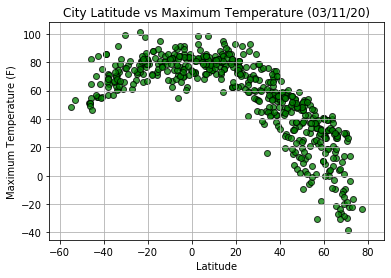

In [5]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

#Latitude vs. Temperature Plot

x_axis = weather_data["Latitude"]
y_axis = weather_data["Max Temperature"]
timestamp = weather_data["Date"][1]
Date = time.strftime("%D", time.localtime(int(timestamp)))
plt.xlim((weather_data["Latitude"]).min()-10,(weather_data["Latitude"]).max()+10)
plt.grid()
plt.title(f"City Latitude vs Maximum Temperature ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.scatter(x_axis,y_axis, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.savefig("Images/Temp_max.png")

The above code is plotting the maximum temperature vs latitude. The above plot indicates that as the latitude increases above zero the temperature seems to be decreasing, also as the latitude decreases below zero the temperature starts decreasing. Hence some of the highest maximum teperatures are between -20 and 20 degree latitude which is around the Equator.

# Latitude vs. Humidity Plot

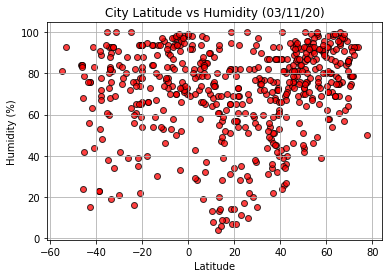

In [6]:
#Latitude vs. Humidity Plot

x_axis = weather_data["Latitude"]
y_axis = weather_data["Humidity"]
plt.grid()
plt.title(f"City Latitude vs Humidity ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis,y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.savefig("Images/Humidity.png")

The above code is plotting a relationship between Latitude vs. Humidity. As we can see from the plot most of the cities seem to have high humdity between 60% and 90%. There are however a handfull of cities which have humidity level below 20%.

# Latitude vs. Cloudiness Plot

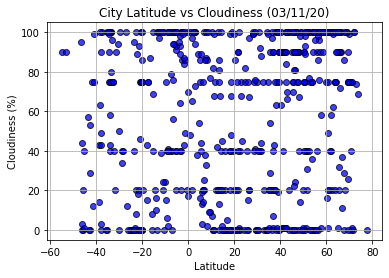

In [7]:
#Latitude vs. Cloudiness Plot

x_axis = weather_data["Latitude"]
y_axis = weather_data["Cloudiness"]
plt.grid()
plt.title(f"City Latitude vs Cloudiness ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.savefig("Images/Cloudiness.png")

The above code is plotting the relationship between Latitude vs. Cloudiness. The cloudiness seems to vary from one city to another as we can see from the plot. There are certain cities which are 100% cloudy to some that have 0% cloudy. It also certainly depends on the time of the day that we are running this code as the latitudes plotted belong to cities spread across the world.

# Latitude vs Wind Speed plot

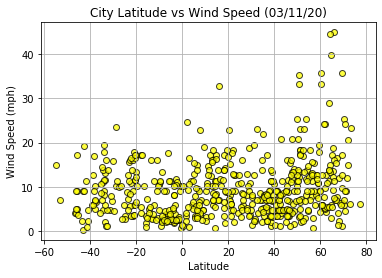

In [8]:
#Latitude vs. Wind Speed Plot

x_axis = weather_data["Latitude"]
y_axis = weather_data["Wind Speed"]
plt.grid()
plt.title(f"City Latitude vs Wind Speed ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis,y_axis, marker="o", facecolors="yellow", edgecolors="black",alpha=0.75)
plt.savefig("Images/Wind_Speed.png")

The above code plots the relationship between Latitude vs. Wind Speed. As we can see most of the cities seem to have a very low windspeed between 0 to 10 mph. However there are few cities at around the 60 and 80 degree latitude that show a slight increase in windspeed.

In [9]:
# Creating a function to plot Linear Regression

def linear_regression(x_values,y_values,color):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    print(f"The r-squared is: {rvalue}")
    regress_value = x_values*slope + intercept
    plt.scatter(x_values,y_values, marker="o", facecolors=color, edgecolors="black",alpha=0.75)
    plt.plot(x_values,regress_value,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x_values.max()-50,y_values.min()),fontsize=15,color='red')

In [10]:
# Creating Northern and Southern Hemisphere DataFrames    

#Northern Hemishere DataFrame
Data_north = weather_data.loc[weather_data["Latitude"]>=0,:]

#Southern Hemishere DataFrame
Data_south = weather_data.loc[weather_data["Latitude"]<0,:]

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8565554169075708


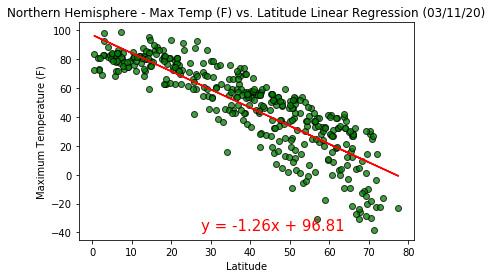

In [11]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

plt.title(f"Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
linear_regression(Data_north["Latitude"],Data_north["Max Temperature"],"green")
plt.savefig("Images/Temp_North.png")

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.522049501164053


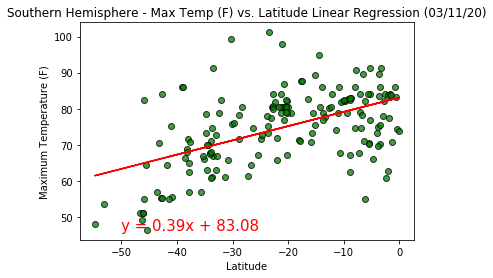

In [12]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression

plt.title(f"Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
linear_regression(Data_south["Latitude"],Data_south["Max Temperature"],"green")
plt.savefig("Images/Temp_South.png")

The above 2 plots show the relationship between the Max Temp vs. Latitude as seen on the Northern and Southern hemishpere.
Temperature seems to gradually decrease as we move away from the equator towards the North which is indicated by the Northern hemishere plot.
Similarly, temperature seems to steadily decrese as we move more towards the south from the Equator as shown in the Southern hemishere plot. 
Consequently we can conclude that the highest tempeatures on earth are around the Equator.

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.345547868552741


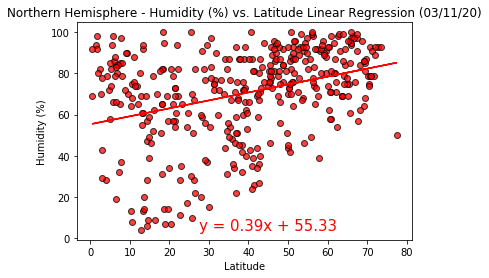

In [13]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
linear_regression(Data_north["Latitude"],Data_north["Humidity"],"red")
plt.savefig("Images/Humidity_North.png")

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21384140871478094


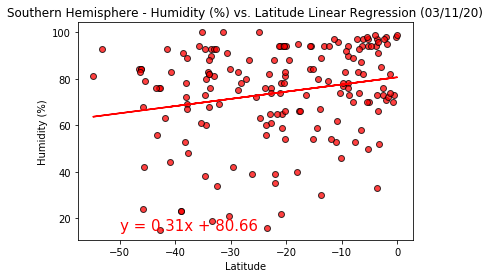

In [14]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
linear_regression(Data_south["Latitude"],Data_south["Humidity"],"red")
plt.savefig("Images/Humidity_South.png")

The above plots show the Humidity (%) vs. Latitude Linear Regression in the Nothern and Southern hemisphere. 
There seems to be slightly positive corelation between the humidity and latitude in the Northern hemisphere athough it is very low as the r squared value is not close to 1.
In the Southern hemishpere there is not much relationship that could be establishes as the r squared value is very low and hence this subset might not be ideal to draw any conclusions.

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1991429031172177


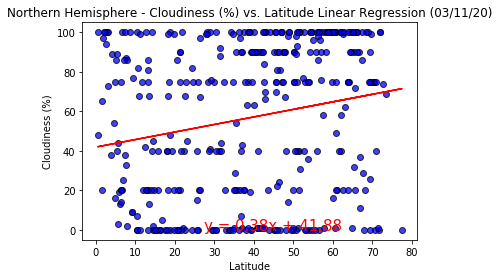

In [15]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
linear_regression(Data_north["Latitude"],Data_north["Cloudiness"],"blue")
plt.savefig("Images/Cloudiness_North.png")

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15616997161902763


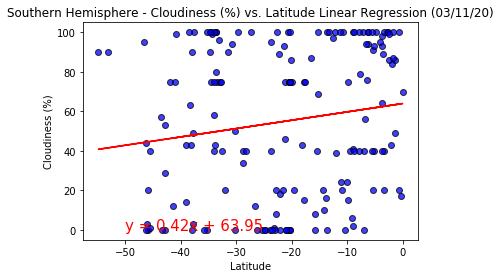

In [16]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({Date})")
linear_regression(Data_south["Latitude"],Data_south["Cloudiness"],"blue")
plt.savefig("Images/Cloudiness_South.png")

The 2 above plots show the relationship between Cloudiness (%) vs. Latitude Linear Regression in the Northen and Southern hemisphere respectively.
In both the Northern and Southern hemisphere the linear regression seems to model a weak fit as there seems to be very weak corelation between the two factors. The r squared values are extemely low for both the hemispheres.

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17921290275523222


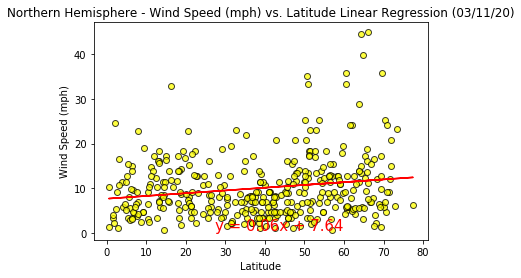

In [17]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({Date})")
linear_regression(Data_north["Latitude"],Data_north["Wind Speed"],"Yellow")
plt.savefig("Images/Windspeed_North.png")

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2219796301199081


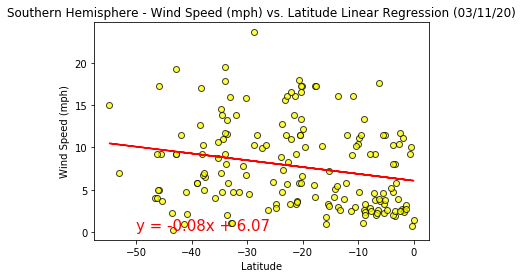

In [18]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({Date})")
linear_regression(Data_south["Latitude"],Data_south["Wind Speed"],"Yellow")
plt.savefig("Images/Windspeed_South.png")

The 2 plots show the relationshop between Wind Speed (mph) vs. Latitude Linear Regression for the Northern and Southern Hemisphere
Once again there is not much realtionship or conclusion that we can draw from the linear regression. There seems to be not much realtionship between the 2 factors as the rsquare values are also pretty low.